- 现在我们有一组从2006年到2016年1000部最流行的电影数据

- 数据来源：https://www.kaggle.com/damianpanek/sunday-eda/data

- 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？
- 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？
- 问题3：对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [19]:
%matplotlib inline
import pandas  as pd 
import numpy as np
from matplotlib import pyplot as plt

#文件的路径
path = "./data/IMDB-Movie-Data.csv"
#读取文件
df = pd.read_csv(path)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# 问题一：
- 我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

得出评分的平均分

In [20]:
df["Rating"].mean()

6.723200000000003

In [21]:
#得出导演人数信息
np.unique(df["Director"]).shape[0]

644


## 对于这一组电影数据，如果我们想Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？

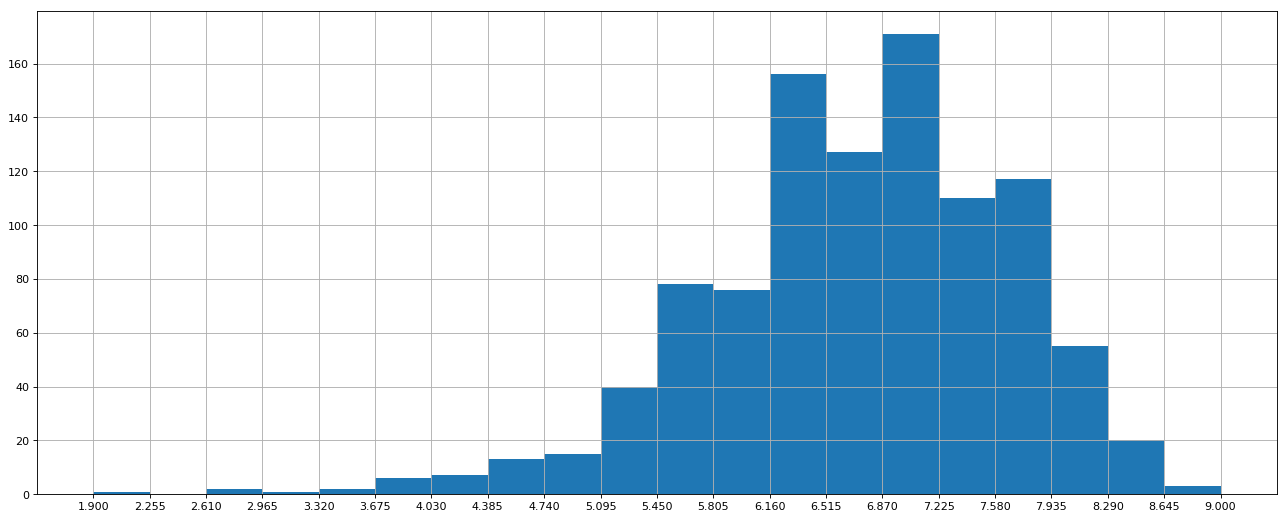

In [23]:
# df["Rating"].plot(kind='hist',figsize=(20,8))
plt.figure(figsize=(20,8),dpi=80)
#.values是转成 numpy array 类型,bins=20 是分成 20 组
plt.hist(df["Rating"].values,bins=20)



#求出最大最小值
max_ = df["Rating"].max()
min_ = df["Rating"].min()
# 生成刻度列表
t1 = np.linspace(min_,max_,num=21)

# [ 1.9    2.255  2.61   2.965  3.32   3.675  4.03   4.385  4.74   5.095  5.45   5.805  6.16   6.515  6.87   7.225  7.58   7.935  8.29   8.645  9.   ]

# 修改刻度,也就是 x 轴的数值
plt.xticks(t1)

# 添加网格
plt.grid()

plt.show()

- Runtime (Minutes)进行分布展示

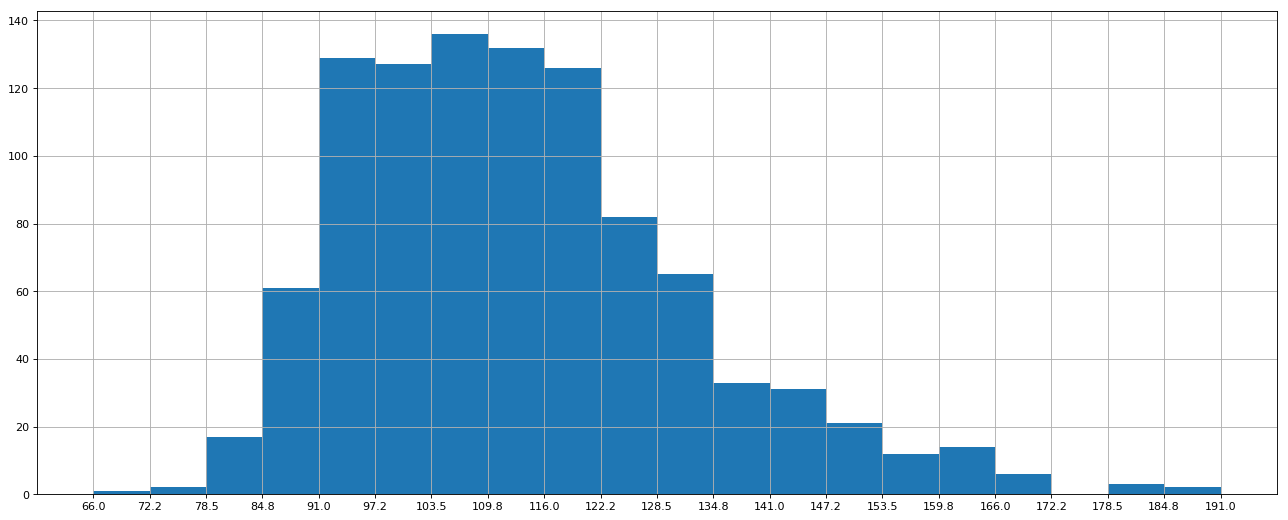

In [11]:
plt.figure(figsize=(20,8),dpi=80)
plt.hist(df["Runtime (Minutes)"].values,bins=20)

# 求出最大最小值
max_ = df["Runtime (Minutes)"].max()
min_ = df["Runtime (Minutes)"].min()

# # 生成刻度列表
#t1 = np.linspace(min_,max_,num=
21)

# 修改刻度
plt.xticks(np.linspace(min_,max_,num=21))

# 添加网格
plt.grid()
plt.show()

# 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

- 1、创建一个全为0的dataframe，列索引置为电影的分类，temp_df
- 2、遍历每一部电影，temp_df中把分类出现的列的值置为1
- 3、求和


- 1、创建一个全为0的dataframe，列索引置为电影的分类，temp_df

In [25]:
# 进行字符串分割,获得电影种类数组[['Action', 'Adventure', 'Sci-Fi'], ['Adventure', 'Mystery', 'Sci-Fi'],----]
temp_list = [i.split(",") for i in df["Genre"]]
# print(temp_list)
genre_list = np.unique([item for sub_list in temp_list for item in sub_list])
print(genre_list)
# 增加新的列
temp_df = pd.DataFrame(np.zeros([df.shape[0],genre_list.shape[0]]),columns=genre_list, index=df['Title'])
temp_df.head()

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'History' 'Horror' 'Music' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Title,,,,,,,,,,,,,,,,,,,,
Guardians of the Galaxy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prometheus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Split,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suicide Squad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 2、遍历每一部电影，temp_df中把分类出现的列的值置为1

In [29]:
for i in range(temp_df.shape[0]):
#     print(temp_list[i])
    #temp_list[i] ['Action','Adventure','Animation']
    temp_df.ix[i,temp_list[i]]=1
temp_df.head()
# print(temp_df.sum(axis=0).sort_values())

/Users/cjz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Title,,,,,,,,,,,,,,,,,,,,
Guardians of the Galaxy,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Prometheus,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Split,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Sing,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suicide Squad,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


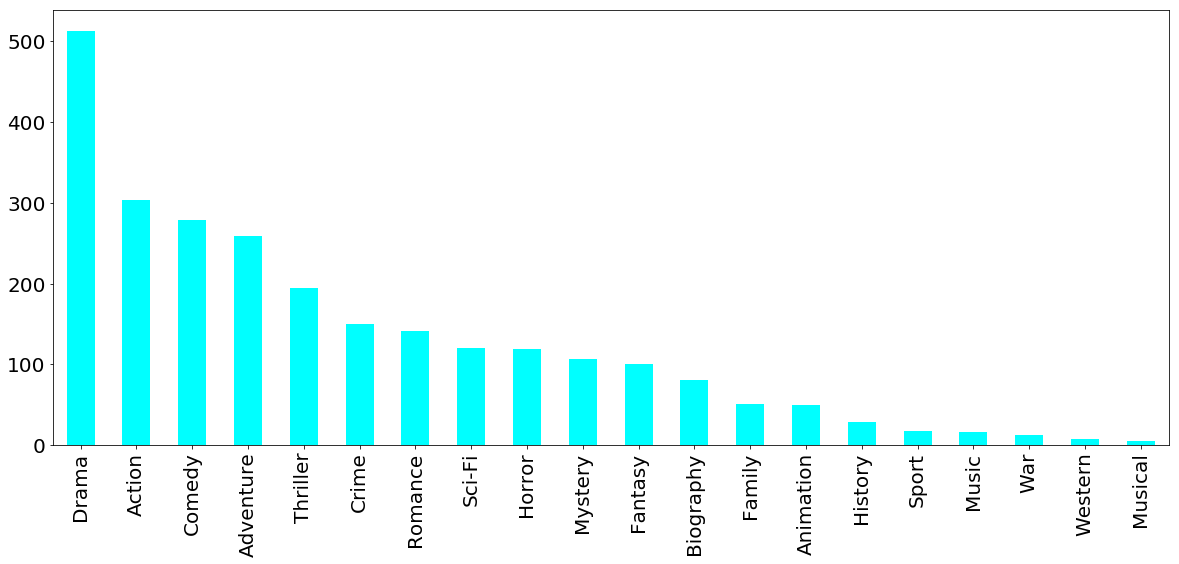

In [30]:
temp_df.sum().sort_values(ascending=False).plot(kind="bar",figsize=(20,8),fontsize=20,colormap="cool")

plt.show()